In [14]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from scipy.io import savemat
import os
from IPython.display import display, Markdown
import pickle

# load data

In [2]:
data_path = "data/"
score_path = "{}/Clustering_silhouette/".format(data_path)
cdf_path = "{}/CDF plots/".format(data_path)
tsne_path = "{}/TSNEplots/".format(data_path)
KCC_path = "{}/KCC/".format(data_path)
f_stat_path = '{}/F_stat/'.format(data_path)
refer_id = pd.read_csv("data/ProteomeViewMICEimputed.csv", index_col=0)

In [3]:
physio_view = pd.read_csv("data/PhysioViewNormalImputed.csv", index_col=0)

contextual_view = pd.read_csv("data/ContextualViewZeroImputed.csv", index_col=0)
clinical_view = pd.concat([physio_view, contextual_view], 1)
clinical_view = clinical_view.loc[
    :,
    ~clinical_view.columns.isin(
        ["pupils", "crp.high", "neonate", "abx.change.cfz", "abx.change.ery"]
    ),
]
proteome_view = pd.read_csv("data/ProteomeViewMICEimputed.csv", index_col=0)

# define feature groups

In [4]:
physio_view_cols = [
    "temp.high",
    "temp.low",
    "rr.high",
    "sato2.low",
    "hr.high",
    "cap.refill",
    "sbp.low",
    "map.low",
    "gcs.low",
    "fio2.high",
    "wcc.high",
    "wcc.low",
    "anc.low",
    "lymph.low",
    "platelets.low",
    "paco2.high",
    "pao2.low",
    "lactate.high",
    "bili.high",
    "crea.high",
    "inr.high",
    "alat.high",
    "cons05.resp",
    "cons05.cvs",
    "cons05.cns",
    "cons05.ren",
    "cons05.hep",
    "cons05.hem",
    "cons05.score",
    "pelod.resp",
    "pelod.cvs",
    "pelod.cns",
    "pelod.ren",
    "pelod.hem",
    "pelod.score",
    "psofa.resp",
    "psofa.cvs",
    "psofa.cns",
    "psofa.ren",
    "psofa.hep",
    "psofa.hem",
    "psofa.score",
    "age.at.bc",
    "ccc.summary",
    "niv",
    "iv",
    "hfnc",
    "ecls",
    "inotrope",
    "crrt",
]


contextual_view_cols = [
    "ccc.neuro",
    "ccc.cardio",
    "ccc.pulmo",
    "ccc.uro",
    "ccc.gastro",
    "ccc.haemimmuno",
    "ccc.metabol",
    "ccc.malform",
    "ccc.onco",
    "ccc.neo",
    "ccc.surg",
    "ccc.techdep",
    "ccc.transplant",
    "abx.change.pen",
    "abx.change.oxa",
    "abx.change.pip",
    "abx.change.cla",
    "abx.change.cxm",
    "abx.change.cro",
    "abx.change.fep",
    "abx.change.mem",
    "abx.change.amk",
    "abx.change.van",
    "abx.change.cip",
    "abx.change.lzd",
    "abx.change.cli",
    "abx.change.mtz",
    "abx.change.sxt",
    "focus_abdominal",
    "focus_clabsi",
    "focus_cns",
    "focus_earnosethroat",
    "focus_endocarditis",
    "focus_osteoarticular",
    "focus_other",
    "focus_pneumonia",
    "focus_primbsi",
    "focus_skin",
    "focus_toxic_shock",
    "focus_uti",
    "focus_wound",
    "patho_candida",
    "patho_cons",
    "patho_ecoli",
    "patho_enterococcus",
    "patho_hinfluenzae",
    "patho_klebsiella",
    "patho_nmeningitidis",
    "patho_othergneg",
    "patho_othergpos",
    "patho_paeruginosa",
    "patho_sagalactiae",
    "patho_saureus",
    "patho_spneumoniae",
    "patho_spyogenes",
    "patho_viridansgroup",
    "cahai_ca",
    "cahai_eos",
    "cahai_hai",
    "cahai_los.ca",
    "cahai_los.hai",
    "cate_comorbidity",
    "cate_healthy",
    "cate_neonate",
    "eth_african",
    "eth_asian",
    "eth_caucasian",
    "eth_jewish",
    "eth_mixed",
    "sex",
]

all_cols = physio_view_cols + contextual_view_cols

In [5]:
demographics = [
    "cate_neonate",
    "eth_asian",
    "eth_mixed",
    "eth_caucasian",
    "eth_african",
    "eth_jewish",
    "sex",
]

chronic_conditions = [
    "ccc.neuro",
    "ccc.cardio",
    "ccc.pulmo",
    "ccc.uro",
    "ccc.gastro",
    "ccc.haemimmuno",
    "ccc.metabol",
    "ccc.malform",
    "ccc.onco",
    "ccc.neo",
    "ccc.surg",
    "ccc.techdep",
    "ccc.transplant",
    "cate_comorbidity",
    "cate_healthy",
]

cons_scores = [
    "cons05.resp",
    "cons05.cvs",
    "cons05.cns",
    "cons05.ren",
    "cons05.hep",
    "cons05.hem",
]

infections = [
    "focus_abdominal",
    "focus_clabsi",
    "focus_cns",
    "focus_earnosethroat",
    "focus_endocarditis",
    "focus_osteoarticular",
    "focus_other",
    "focus_pneumonia",
    "focus_primbsi",
    "focus_skin",
    "focus_toxic_shock",
    "focus_uti",
    "focus_wound",
    "cahai_ca",
    "cahai_eos",
    "cahai_hai",
    "cahai_los.ca",
    "cahai_los.hai",
]


pathogen = [
    "patho_candida",
    "patho_cons",
    "patho_ecoli",
    "patho_enterococcus",
    "patho_hinfluenzae",
    "patho_klebsiella",
    "patho_nmeningitidis",
    "patho_othergneg",
    "patho_othergpos",
    "patho_paeruginosa",
    "patho_sagalactiae",
    "patho_saureus",
    "patho_spneumoniae",
    "patho_spyogenes",
    "patho_viridansgroup",
]


abx_treatment = [
    "abx.change.pen",
    "abx.change.oxa",
    "abx.change.pip",
    "abx.change.cla",
    "abx.change.cxm",
    "abx.change.cro",
    "abx.change.fep",
    "abx.change.mem",
    "abx.change.amk",
    "abx.change.van",
    "abx.change.cip",
    "abx.change.lzd",
    "abx.change.cli",
    "abx.change.mtz",
    "abx.change.sxt",
]

treatment = [
    "abx.change.pen",
    "abx.change.oxa",
    "abx.change.pip",
    "abx.change.cla",
    "abx.change.cxm",
    "abx.change.cro",
    "abx.change.fep",
    "abx.change.mem",
    "abx.change.amk",
    "abx.change.van",
    "abx.change.cip",
    "abx.change.lzd",
    "abx.change.cli",
    "abx.change.mtz",
    "abx.change.sxt",
    "niv",
    "iv",
    "hfnc",
    "ecls",
    "inotrope",
    "crrt",
]


In [6]:
demographics = [
    "cate_neonate",
    "eth_asian",
    "eth_mixed",
    "eth_caucasian",
    "eth_african",
    "eth_jewish",
    "sex",
]

context = (
    chronic_conditions + cons_scores + ["niv", "iv", "hfnc", "ecls", "inotrope", "crrt"]
)

infections_new = infections + pathogen + abx_treatment

organs_new = [
    "cons05.resp",
    "cons05.cvs",
    "cons05.cns",
    "cons05.ren",
    "cons05.hep",
    "cons05.hem",
    "cons05.score",
    "pelod.resp",
    "pelod.cvs",
    "pelod.cns",
    "pelod.ren",
    "pelod.hem",
    "pelod.score",
    "psofa.resp",
    "psofa.cvs",
    "psofa.cns",
    "psofa.ren",
    "psofa.hep",
    "psofa.hem",
    "psofa.score",
]

physio_measurements = [
    "temp.high",
    "temp.low",
    "rr.high",
    "sato2.low",
    "hr.high",
    "cap.refill",
    "sbp.low",
    "map.low",
    "gcs.low",
    "fio2.high",
    "wcc.high",
    "wcc.low",
    "anc.low",
    "lymph.low",
    "platelets.low",
    "paco2.high",
    "pao2.low",
    "lactate.high",
    "bili.high",
    "crea.high",
    "inr.high",
    "alat.high",
]

binarys = {
    "demographics": demographics,
    "context": context,
    "infections": infections_new,
}
binary_cols = demographics + context + infections_new
continous_cols = [col for col in all_cols if col not in binary_cols]

## save feature groups pickle file

In [8]:
features = {}
features["demographics"] = demographics + ['age.at.bc']
features["context"] = context + ['ccc.summary']
features["infections"] = infections_new
features["physio measurements"] = physio_measurements
features["organs"] = organs_new
with open('{}/Features.pkl'.format(data_path), 'wb') as fp:
    pickle.dump(features, fp)

# PCA on binary features

In [9]:
from sklearn.decomposition import PCA

sc = StandardScaler()
binary_data = []
pc_cols = []
k = 0
for key, value in binarys.items():
    subdata = sc.fit_transform(clinical_view[value])
    pca = PCA()
    subdata = pca.fit_transform(subdata)
    subdata = pd.DataFrame(subdata, index=clinical_view[value].index, columns=value)
    idx = (~(pca.explained_variance_ratio_.cumsum() > 0.95)).sum() + 1
    binary_data.append(subdata.iloc[:, :idx])

    pc_cols.extend(
        ["{}_PC_{}".format(key, i + 1) for i in range(binary_data[k].shape[1])]
    )
    k += 1

## linear combination of PCs

In [40]:
for key, value in binarys.items():
    subdata = clinical_view[value]
    pca = PCA()
    subdata = pca.fit_transform(subdata)
    display(Markdown('**{}**'.format(key)))

    PCs = pd.DataFrame(
        pca.components_.T,
        columns=["PC {}".format(i) for i in range(1, len(pca.components_) + 1)],
        index=value,
    )
    for pc in PCs.columns:
        coefs = PCs[pc]
        f = " + ".join(
            ["{} * {}".format(coefs.iloc[k].round(3), coefs.index[k]) for k in range(len(coefs))]
        )

        print("{} = {}".format(pc, f))
        print('\n')
    print("-" * 110)


**demographics**

PC 1 = -0.087 * cate_neonate + 0.043 * eth_asian + 0.029 * eth_mixed + -0.064 * eth_caucasian + -0.008 * eth_african + -0.004 * eth_jewish + -0.993 * sex


PC 2 = 0.978 * cate_neonate + -0.069 * eth_asian + -0.019 * eth_mixed + 0.158 * eth_caucasian + -0.067 * eth_african + 0.007 * eth_jewish + -0.099 * sex


PC 3 = 0.182 * cate_neonate + 0.186 * eth_asian + 0.36 * eth_mixed + -0.853 * eth_caucasian + 0.267 * eth_african + 0.016 * eth_jewish + 0.055 * sex


PC 4 = 0.05 * cate_neonate + 0.156 * eth_asian + -0.744 * eth_mixed + -0.069 * eth_caucasian + 0.644 * eth_african + 0.006 * eth_jewish + -0.02 * sex


PC 5 = 0.034 * cate_neonate + 0.819 * eth_asian + -0.256 * eth_mixed + -0.077 * eth_caucasian + -0.505 * eth_african + 0.009 * eth_jewish + 0.034 * sex


PC 6 = -0.011 * cate_neonate + -0.321 * eth_asian + -0.304 * eth_mixed + -0.282 * eth_caucasian + -0.31 * eth_african + 0.793 * eth_jewish + -0.004 * sex


PC 7 = 0.004 * cate_neonate + -0.4 * eth_asian + -0.398 * eth_mixed + -0.39 

**context**

PC 1 = 0.021 * ccc.neuro + 0.135 * ccc.cardio + 0.096 * ccc.pulmo + 0.055 * ccc.uro + 0.081 * ccc.gastro + 0.015 * ccc.haemimmuno + 0.015 * ccc.metabol + 0.036 * ccc.malform + 0.235 * ccc.onco + 0.059 * ccc.neo + 0.154 * ccc.surg + 0.005 * ccc.techdep + 0.012 * ccc.transplant + 0.539 * cate_comorbidity + -0.544 * cate_healthy + 0.21 * cons05.resp + 0.215 * cons05.cvs + 0.095 * cons05.cns + 0.035 * cons05.ren + 0.112 * cons05.hep + 0.34 * cons05.hem + 0.041 * niv + 0.187 * iv + 0.017 * hfnc + 0.002 * ecls + 0.162 * inotrope + 0.017 * crrt


PC 2 = -0.018 * ccc.neuro + 0.042 * ccc.cardio + 0.132 * ccc.pulmo + -0.021 * ccc.uro + 0.022 * ccc.gastro + -0.017 * ccc.haemimmuno + -0.0 * ccc.metabol + 0.03 * ccc.malform + -0.315 * ccc.onco + 0.259 * ccc.neo + 0.139 * ccc.surg + -0.005 * ccc.techdep + -0.009 * ccc.transplant + -0.378 * cate_comorbidity + 0.051 * cate_healthy + 0.532 * cons05.resp + 0.266 * cons05.cvs + 0.185 * cons05.cns + 0.021 * cons05.ren + -0.068 * cons05.hep + -0.133 * cons

**infections**

PC 1 = -0.019 * focus_abdominal + 0.467 * focus_clabsi + -0.047 * focus_cns + -0.014 * focus_earnosethroat + 0.002 * focus_endocarditis + -0.049 * focus_osteoarticular + -0.006 * focus_other + -0.165 * focus_pneumonia + -0.032 * focus_primbsi + -0.058 * focus_skin + -0.009 * focus_toxic_shock + -0.096 * focus_uti + 0.026 * focus_wound + -0.575 * cahai_ca + 0.014 * cahai_eos + 0.309 * cahai_hai + -0.006 * cahai_los.ca + 0.258 * cahai_los.hai + 0.03 * patho_candida + 0.23 * patho_cons + -0.061 * patho_ecoli + 0.018 * patho_enterococcus + -0.022 * patho_hinfluenzae + 0.045 * patho_klebsiella + -0.01 * patho_nmeningitidis + 0.023 * patho_othergneg + 0.004 * patho_othergpos + 0.007 * patho_paeruginosa + -0.036 * patho_sagalactiae + 0.072 * patho_saureus + -0.213 * patho_spneumoniae + -0.077 * patho_spyogenes + -0.011 * patho_viridansgroup + -0.287 * abx.change.pen + 0.091 * abx.change.oxa + 0.005 * abx.change.pip + -0.005 * abx.change.cla + -0.009 * abx.change.cxm + 0.016 * abx.change.cro +

# log transform

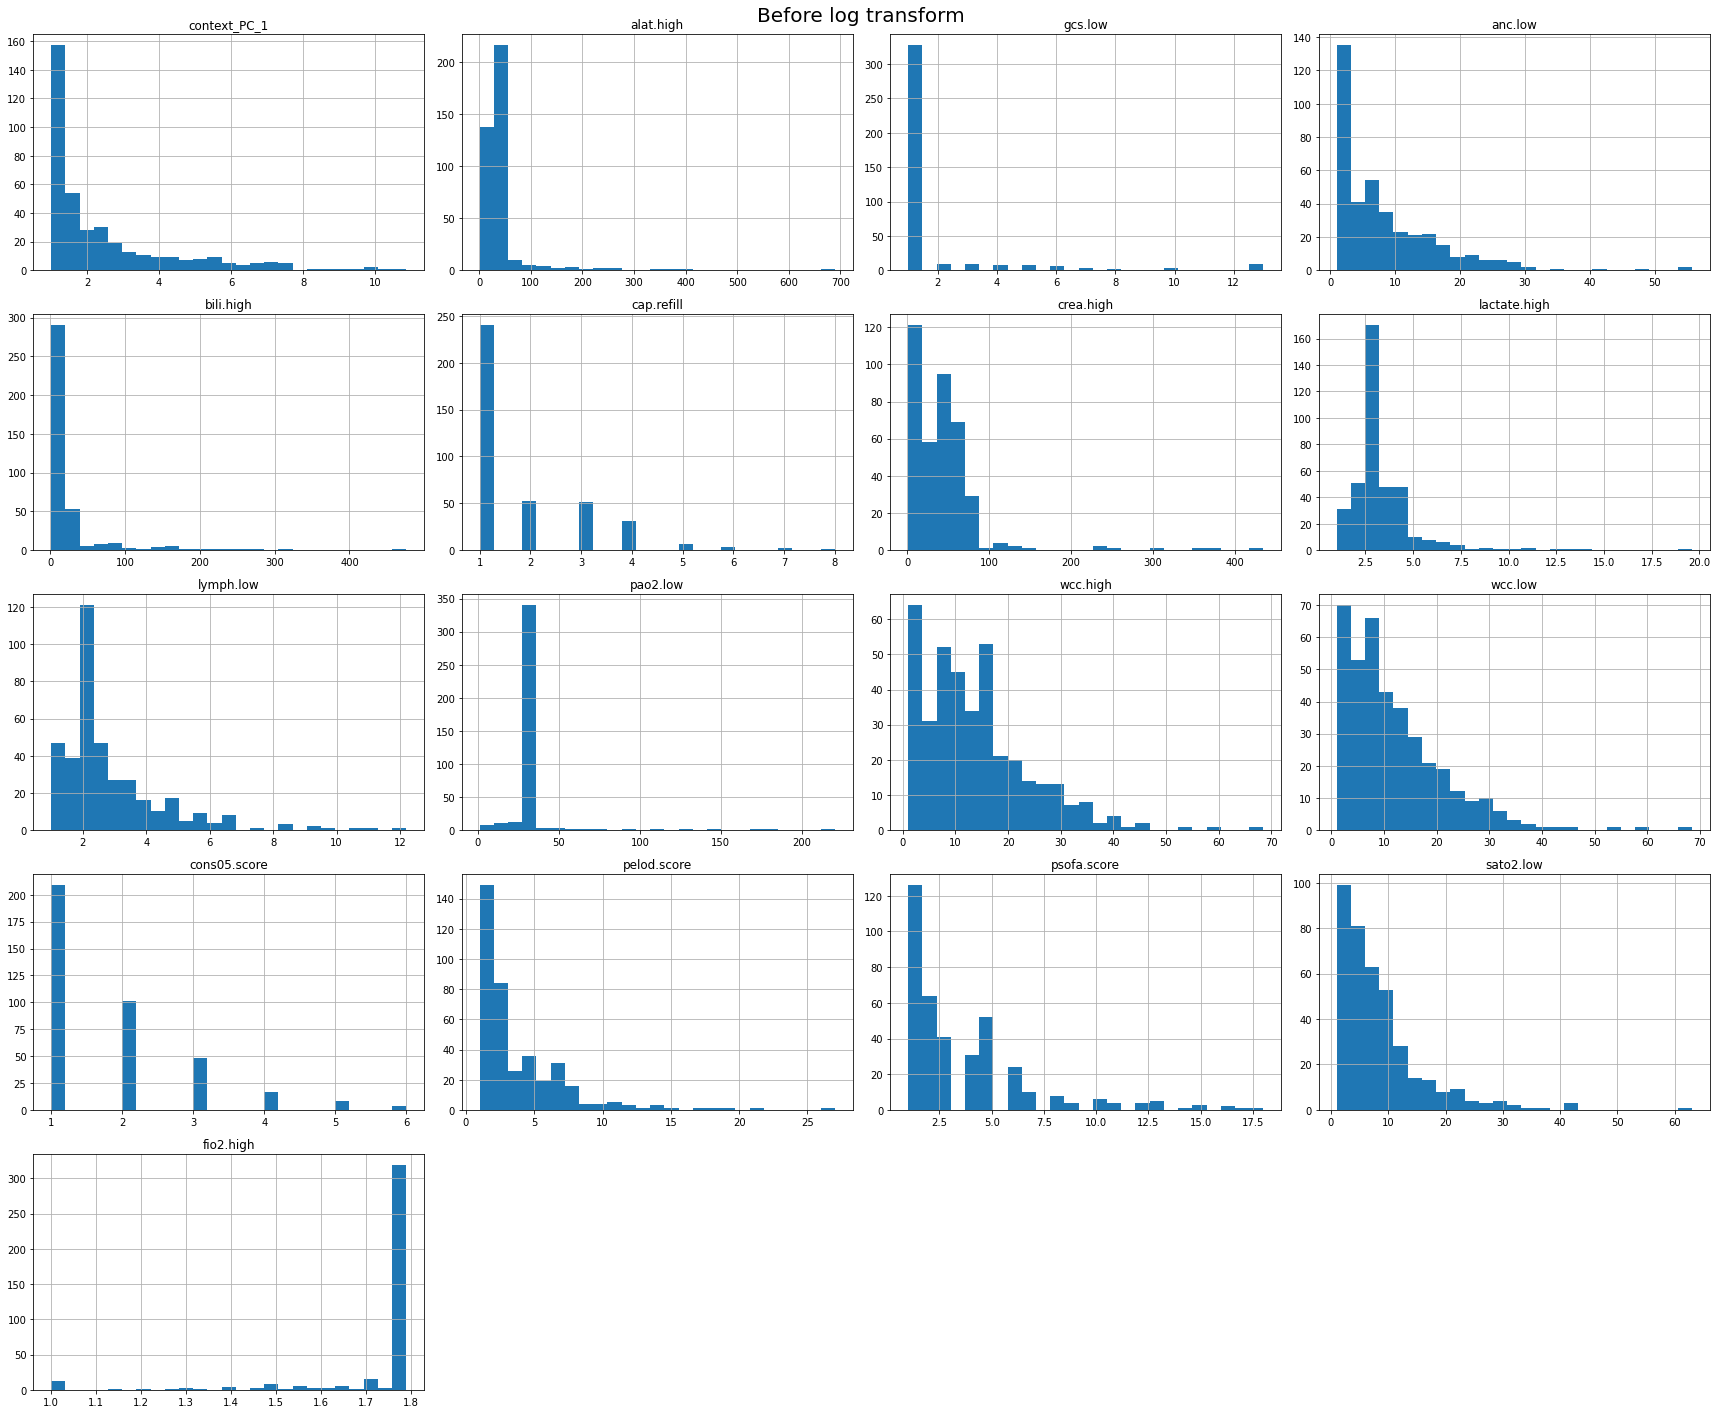

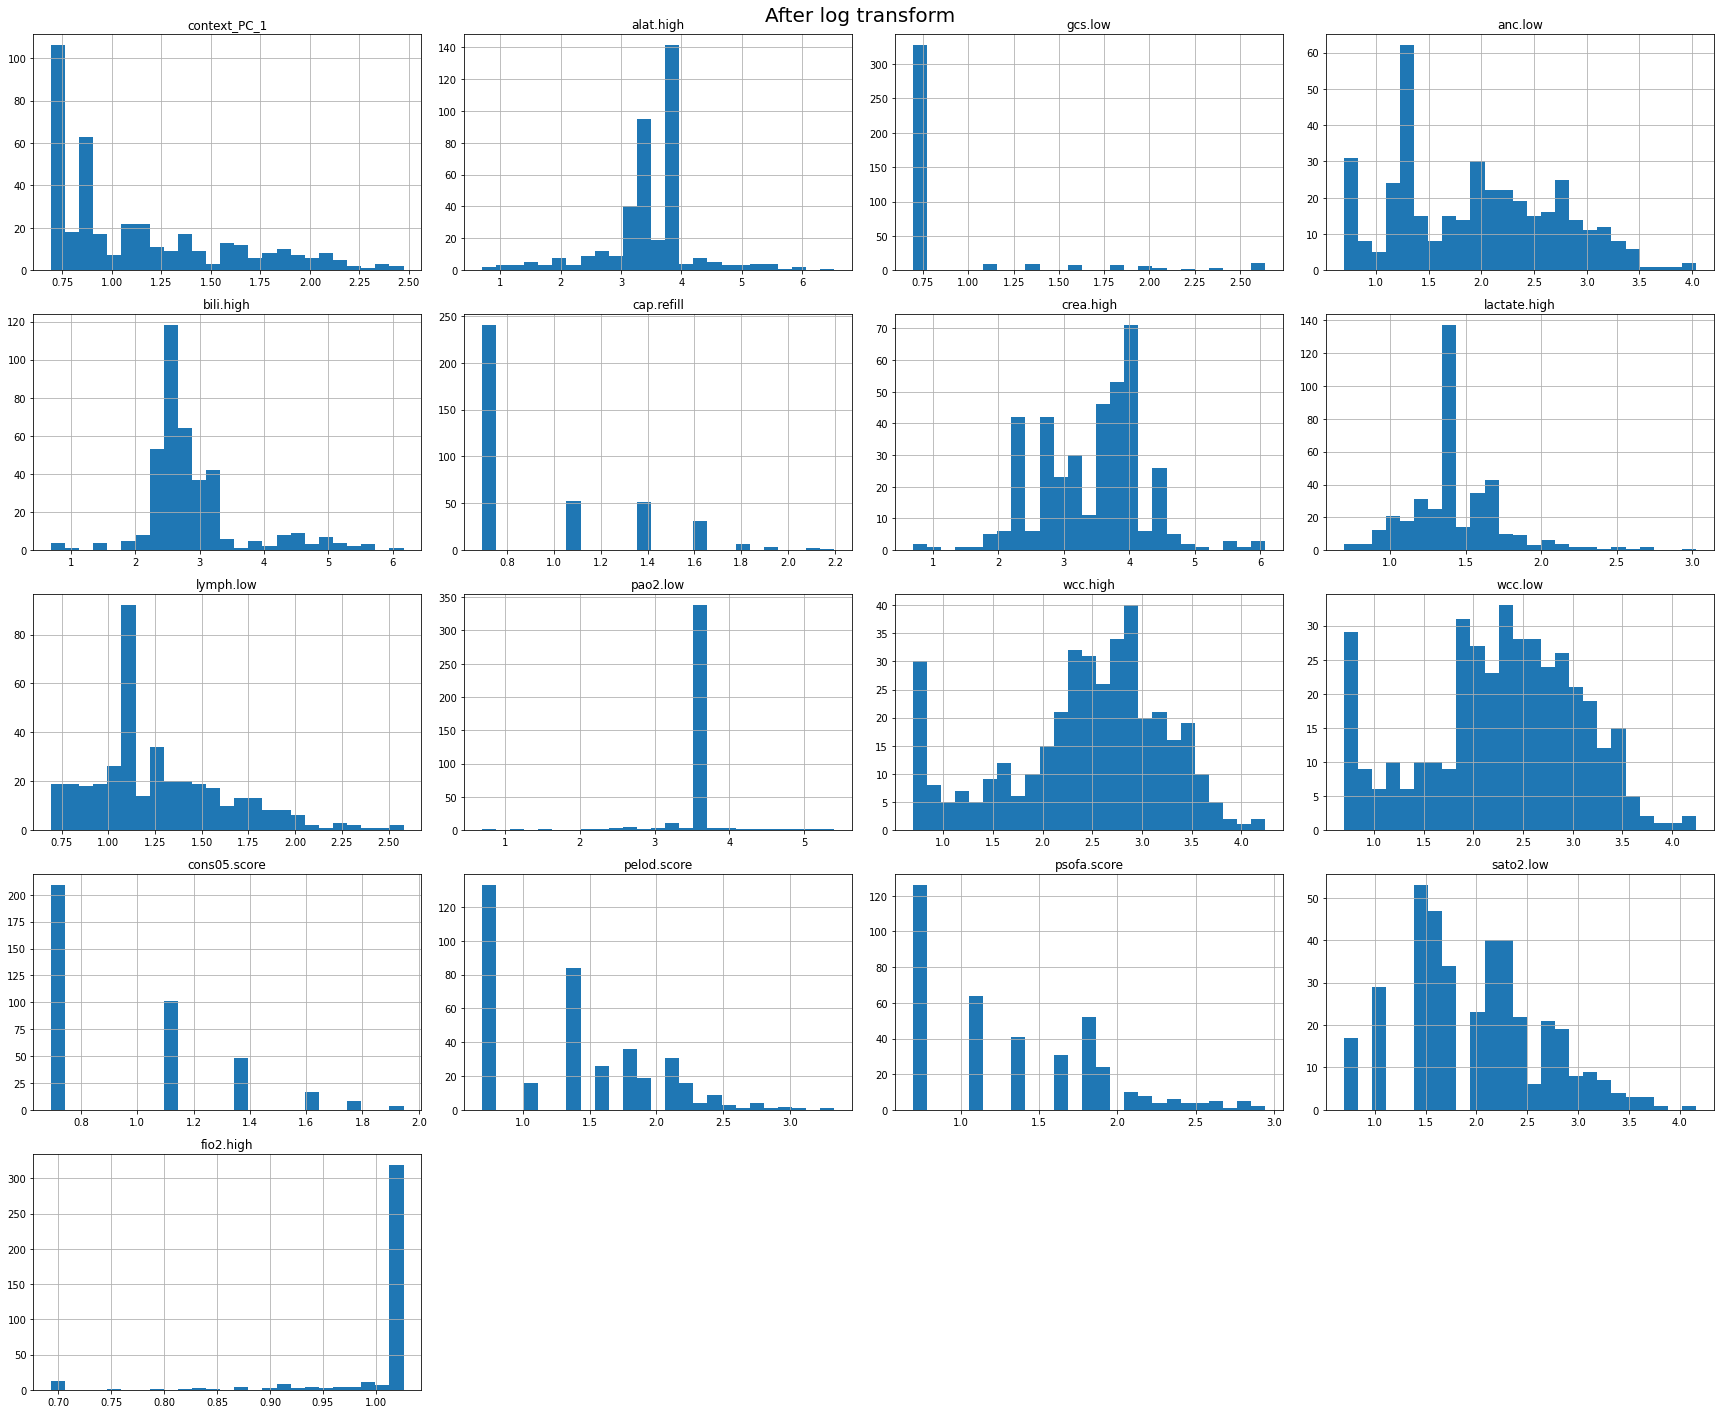

In [9]:
clinical_binary_pcas = pd.concat(binary_data, 1)
clinical_binary_pcas.columns = pc_cols
clinical_continous = clinical_view[continous_cols]
clinical_view_new = pd.concat([clinical_continous, clinical_binary_pcas], 1)

cols_to_log = [
    "context_PC_1",
    "alat.high",
    "gcs.low",
    "anc.low",
    "bili.high",
    "cap.refill",
    "crea.high",
    "lactate.high",
    "lymph.low",
    "pao2.low",
    "wcc.high",
    "wcc.low",
    "cons05.score",
    "pelod.score",
    "psofa.score",
    "sato2.low",
    "fio2.high",
]

clinical_view_new["sato2.low"] = (
    clinical_view_new["sato2.low"].max() - clinical_view_new["sato2.low"]
)
clinical_view_new["gcs.low"] = (
    clinical_view_new["gcs.low"].max() - clinical_view_new["gcs.low"]
)
clinical_view_new["fio2.high"] = clinical_view_new["fio2.high"].max() - clinical_view_new["fio2.high"]

clinical_view_new[cols_to_log] = (
    clinical_view_new[cols_to_log] - clinical_view_new[cols_to_log].min() + 1
)

clinical_view_new[cols_to_log].hist(bins=25, figsize=(24, 20))
plt.suptitle("Before log transform", fontsize=20)
plt.tight_layout()
plt.show()

clinical_view_new[cols_to_log] = np.log(clinical_view_new[cols_to_log] + 1)
clinical_view_new[cols_to_log].hist(bins=25, figsize=(24, 20))
plt.suptitle("After log transform", fontsize=20)
plt.tight_layout()
plt.show()

# standardization 

In [14]:
sc = StandardScaler()
clinical_binary_pcas_std = pd.DataFrame(
    sc.fit_transform(clinical_view_new[clinical_binary_pcas.columns]),
    columns=clinical_binary_pcas.columns,
    index=clinical_binary_pcas.index,
)
clinical_binary_pcas_std.to_csv("{}/ContextualViewStandardized.csv".format(data_path))


clinical_continous_std = pd.DataFrame(
    sc.fit_transform(clinical_view_new[clinical_continous.columns]),
    columns=clinical_continous.columns,
    index=clinical_continous.index,
)
clinical_continous_std.to_csv("{}/PhysioViewStandardized.csv".format(data_path))

clinical_view_new_std = pd.concat([clinical_continous_std, clinical_binary_pcas_std], 1)

proteome_view_std = pd.DataFrame(
    sc.fit_transform(proteome_view),
    columns=proteome_view.columns,
    index=proteome_view.index,
)
proteome_view_std.to_csv("{}/ProteomeViewStandardized.csv".format(data_path))

clinical_binary = clinical_view[binary_cols].astype(int)
clinical_binary.to_csv('{}/ClinicalBinary.csv'.format(data_path))

In [25]:
Cov_binary = clinical_view[
    ["sex", "eth_asian", "eth_mixed", "eth_caucasian", "eth_african", "eth_jewish"]
]

Cov_binary = sc.fit_transform(Cov_binary)
pca = PCA()
Cov_binary = pca.fit_transform(Cov_binary)
idx = (~(pca.explained_variance_ratio_.cumsum() > 0.95)).sum() + 1
Cov_binary = Cov_binary[:, :idx]
Cov = np.hstack([physio_view["age.at.bc"].values.reshape(-1, 1), Cov_binary])

kcc_input = {}
kcc_input["Cov"] = Cov
kcc_input["Physio"] = clinical_continous_std.values
kcc_input["Contextual"] = clinical_binary_pcas_std.values
kcc_input["Clinical"] = clinical_view_new_std.values
kcc_input["Proteome"] = proteome_view_std.values
savemat(
    "data_CovNotStandardized/Cov_AgeSexEth_NormalImputation.mat", kcc_input
)

sex              0.625323
eth_asian        0.031008
eth_mixed        0.046512
eth_caucasian    0.875969
eth_african      0.038760
eth_jewish       0.002584
dtype: float64
[-8.72113177e-17 -9.18013870e-18  3.67205548e-17  2.75404161e-17
 -2.75404161e-17 -1.37702081e-17]


# visualize normal-imputed vs original

In [ ]:
feature_dict = pd.read_pickle("selected_features.pkl")
data_episode = pd.read_csv("../olinks/spss_mlcb_olink_episode.csv", index_col=0)
data_episode = data_episode[
    (data_episode["sample.intv.d"] <= 6) & (data_episode["sample.intv.d"] >= 0)
]
npx_raw = pd.read_csv("data/All Panels_2022_2020_raw_NPX_olink.csv", index_col=0)
bcday = pd.read_csv("../Data/spss_mlcb_day.csv", index_col=["sample.id"])
bcday = bcday[bcday["redcap.event.name"] == "day_sampling"]
bcday = bcday[bcday["data.available"] == "yes"]
bcday_raw = bcday[bcday.index.isin(npx_raw.index)]
bcday_raw["age.at.bc"] = data_episode["age.at.bc.days"]

npx_raw = npx_raw[npx_raw.index.isin(bcday_raw.index)]
npx_raw = npx_raw.loc[bcday_raw.index]
assert (npx_raw.index == bcday_raw.index).all()

npx_raw_sub = npx_raw[npx_raw.index.isin(data_episode.index)]
bcday_raw_sub = bcday_raw[bcday_raw.index.isin(data_episode.index)]
assert (npx_raw_sub.index == bcday_raw_sub.index).all()

data_episode_sub = data_episode[data_episode.index.isin(bcday_raw_sub.index)]
# bcday_raw_sub['fio2.high'] = bcday_raw_sub['fio2.high'].fillna(0.21)

In [ ]:
physio_measurement = [
    "temp.high",
    "temp.low",
    "rr.high",
    "sato2.low",
    "hr.high",
    "cap.refill",
    "sbp.low",
    "map.low",
    "gcs.low",
    "fio2.high",
    "wcc.high",
    "wcc.low",
    "anc.low",
    "lymph.low",
    "platelets.low",
    "paco2.high",
    "pao2.low",
    "lactate.high",
    "bili.high",
    "crea.high",
    "inr.high",
    "alat.high",
]
physio_view_original = pd.read_csv("data/PhysioView.csv", index_col=0)
physio_view_raw = bcday_raw_sub[physio_measurement]
physio_view = pd.read_csv("data/PhysioViewNormalImputed.csv", index_col=0)

plt.figure(figsize=(24, 16))
for i, col in enumerate(physio_measurement):
    plt.subplot(4, 6, i + 1)
    plt.hist(
        physio_view[col],
        alpha=0.5,
        weights=np.ones_like(physio_view[col]) / len(physio_view[col]),
        bins=20,
        color="r",
        label="imputed",
    )
    plt.hist(
        physio_view_raw[col],
        alpha=0.5,
        weights=np.ones_like(physio_view_raw[col]) / len(physio_view_raw[col]),
        bins=20,
        color="b",
        label="original",
    )

    plt.legend()
    plt.title(col, fontsize=15)
plt.show()

In [ ]:
import seaborn as sns
sns.set_style('white')
physio_measurement = ['temp.high', 'temp.low', 'rr.high', 'sato2.low', 'hr.high',
                       'cap.refill', 'sbp.low', 'map.low', 'gcs.low', 'fio2.high', 'wcc.high', 
                       'wcc.low', 'anc.low', 'lymph.low', 'platelets.low','paco2.high', 'pao2.low', 
                       'lactate.high', 'bili.high', 'crea.high', 'inr.high', 'alat.high']
physio_view_raw = bcday_raw_sub[physio_measurement]
physio_view = pd.read_csv('data/PhysioViewNormalImputed.csv', index_col=0)

plt.figure(figsize=(24,20))
for i, col in enumerate(physio_measurement):
    plt.subplot(5, 5, i + 1)
    physio_view[col].hist(bins=20,alpha=0.5, density=True, label='imputed')
    physio_view_raw[col].hist(bins=20,alpha=0.5, density=True, label='original')
    plt.legend()
    plt.title(col, fontsize=15)
plt.suptitle('Normal imputation', fontsize=25)
plt.show()

In [ ]:
continous_cols = [col for col in all_cols if col not in binary_cols] 
clinical_continous = clinical_view[continous_cols]
clinical_binary = clinical_view[binary_cols]


In [ ]:
sc = StandardScaler()
clinical_continous[clinical_continous.columns] = sc.fit_transform(clinical_continous)
clinical_view_new = pd.concat([clinical_continous, clinical_binary], 1)
clinical_view_new.to_csv('data/ClinicalViewStandardized_NormalImputed.csv')

In [ ]:
from sklearn.decomposition import PCA
binary_data = []
pc_cols = []
k = 0
for key, value in binarys.items():
    subdata = clinical_view[value]
    pca = PCA()
    subdata = pca.fit_transform(subdata)
    subdata = pd.DataFrame(subdata,
                           index=clinical_view[value].index, 
                           columns=value)

    binary_data.append(subdata.loc[:, ~(pca.explained_variance_.cumsum() > 0.95)])
    pc_cols.extend(['{}_PC_{}'.format(key, i + 1) for i in range(binary_data[k].shape[1])])
    k += 1

In [ ]:
clinical_binary_pcas = pd.concat(binary_data, 1)
clinical_binary_pcas.columns = pc_cols

clinical_continous = clinical_view[continous_cols]
clinical_continous[clinical_continous.columns] = sc.fit_transform(clinical_continous)

clinical_view_PCA = pd.concat([clinical_continous, clinical_binary_pcas], 1)
clinical_view_PCA.to_csv('data/ClinicalViewStandardized_binary_pca_95%.csv')

proteome_view = pd.read_csv('data/ProteomeViewMICEimputed.csv', index_col=0)
proteome_view[proteome_view.columns] = sc.fit_transform(proteome_view)
proteome_view.to_csv('data/ProteomeViewStandardized.csv')

kcc_input_sub = {}
kcc_input_sub['Cov'] = np.vstack((physio_view['age.at.bc'].values, contextual_view['sex'].values)).T
kcc_input_sub['Clinical'] = clinical_view_new.values
kcc_input_sub['Clinical_PCA'] = clinical_view_PCA.values
kcc_input_sub['Proteome'] = proteome_view.values
savemat('data/TwoViews_AgeSex_NormalImputation_PCA95%.mat', kcc_input_sub) 

In [ ]:
for k in [2, 3, 4]:
    kcc = pd.read_csv('data/KCC_clinical_PCA_NormalImputation_PCA95%_K_{}.csv'.format(k), header=None)
    kcc.columns = ['KCC {}'.format(i) for i in range(1, k+1)]
    kcc.index = clinical_view_new.index
    kcc.to_csv('data/KCC_clinical_PCA_NormalImputation_PCA95%_K_{}.csv'.format(k))
    
    kcc = pd.read_csv('data/KCC_proteome_NormalImputation_PCA95%_K_{}.csv'.format(k), header=None)
    kcc.columns = ['KCC {}'.format(i) for i in range(1, k+1)]
    kcc.index = clinical_view_new.index
    kcc.to_csv('data/KCC_proteome_NormalImputation_PCA95%_K_{}.csv'.format(k))
    

In [ ]:
sc = StandardScaler()
clinical_binary_pcas = pd.concat(binary_data, 1)
clinical_binary_pcas.columns = pc_cols
clinical_binary_pcas[clinical_binary_pcas.columns] = sc.fit_transform(clinical_binary_pcas)

clinical_continous = clinical_view[continous_cols]
clinical_continous[clinical_continous.columns] = sc.fit_transform(clinical_continous)

clinical_view_PCA = pd.concat([clinical_continous, clinical_binary_pcas], 1)
clinical_view_PCA.to_csv('data/ClinicalViewStandardized_binary_pca_Standardized_95%.csv')

proteome_view = pd.read_csv('data/ProteomeViewMICEimputed.csv', index_col=0)
proteome_view[proteome_view.columns] = sc.fit_transform(proteome_view)
proteome_view.to_csv('data/ProteomeViewStandardized.csv')

kcc_input_sub = {}
kcc_input_sub['Cov'] = np.vstack((physio_view['age.at.bc'].values, contextual_view['sex'].values)).T
kcc_input_sub['Clinical'] = clinical_view_new.values
kcc_input_sub['Clinical_PCA'] = clinical_view_PCA.values
kcc_input_sub['Proteome'] = proteome_view.values
savemat('data/TwoViews_AgeSex_NormalImputation_PCA95%Standardized.mat', kcc_input_sub) 

In [ ]:
for k in [2, 3, 4]:
    kcc = pd.read_csv('data/KCC_clinical_PCA_NormalImputation_PCA95%_K_{}.csv'.format(k), header=None)
    kcc.columns = ['KCC {}'.format(i) for i in range(1, k+1)]
    kcc.index = clinical_view_new.index
    kcc.to_csv('data/KCC_clinical_PCA_NormalImputation_PCA95%_K_{}.csv'.format(k))
    
    kcc = pd.read_csv('data/KCC_proteome_NormalImputation_PCA95%_K_{}.csv'.format(k), header=None)
    kcc.columns = ['KCC {}'.format(i) for i in range(1, k+1)]
    kcc.index = clinical_view_new.index
    kcc.to_csv('data/KCC_proteome_NormalImputation_PCA95%_K_{}.csv'.format(k))
    